 ## **LetsGrowMore-Data Science Virtual Internship**
 #### **Advanced Level**
 #### **Task 1- Develope A Neural Network That Can Read Handwriting**
 #### **Author-**
 #### **Puja Niranjan Shah**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.datasets import mnist
mnist=mnist.load_data()
(x_train_full,y_train_full),(x_test,y_test)=mnist

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x train data size'+str(x_train_full.shape))
print('x test data size'+str(x_test.shape))

x train data size(60000, 28, 28)
x test data size(10000, 28, 28)


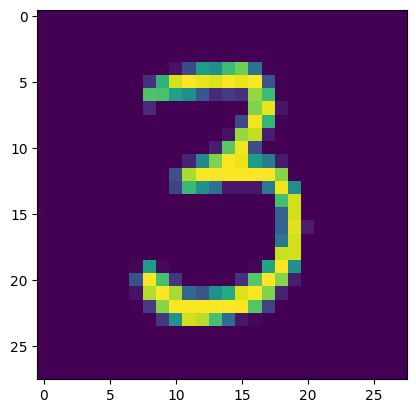

In [ ]:
plt.imshow(x_train_full[50])

In [ ]:
y_train_full[50]

3

In [ ]:
digit_names=["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]
digit_names[y_train_full[50]]

'Three'

In [ ]:
x_train_full[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Data Normalization:-
We normalize the dataset dimensions so that they are of equal scale.
## Splitting dataset:-
* Training data-It is used for training the model
* Validation data-It is used for tunning the hyperparameters and evalute the model
*Test Data-It is used for test the model after the model gone through the initial verifying by the validation set

In [ ]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

In [ ]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


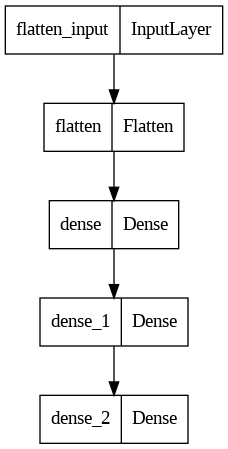

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weight,bias=model.layers[1].get_weights()
weight

array([[ 0.05479155, -0.06214104,  0.05555448, ..., -0.00864245,
         0.02445344,  0.05375543],
       [-0.00631714, -0.02024253,  0.02529898, ..., -0.03369479,
        -0.01662347, -0.04090296],
       [-0.04855906,  0.00951152, -0.00845964, ..., -0.01121172,
         0.05478677, -0.00905977],
       ...,
       [ 0.05056956,  0.06888172,  0.01150145, ...,  0.01264115,
         0.03374341, -0.04627331],
       [ 0.07313083,  0.02197655, -0.030903  , ...,  0.00852238,
        -0.04936193, -0.02784079],
       [ 0.04692163, -0.07093919,  0.03352692, ...,  0.04923671,
        -0.03432257,  0.00813729]], dtype=float32)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model_history = model.fit(x_train,y_train,epochs=30,
                        validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6159 - accuracy: 0.8435 - val_loss: 0.3007 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.9187 - val_loss: 0.2342 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2286 - accuracy: 0.9343 - val_loss: 0.1952 - val_accuracy: 0.9464
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1952 - accuracy: 0.9445 - val_loss: 0.1747 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1712 - accuracy: 0.9510 - val_loss: 0.1558 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1523 - accuracy: 0.9561 - val_loss: 0.1447 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1368 - accuracy: 0.9610 - val_loss: 0.1329 - val_accuracy:

In [ ]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model.history.history

{'loss': [0.6159003973007202,
  0.28140708804130554,
  0.22863107919692993,
  0.1951971799135208,
  0.17124943435192108,
  0.15232542157173157,
  0.13681794703006744,
  0.12399131059646606,
  0.11332527548074722,
  0.10433632880449295,
  0.09586861729621887,
  0.08870736509561539,
  0.08236788213253021,
  0.07661818712949753,
  0.07129943370819092,
  0.06664125621318817,
  0.062347572296857834,
  0.058553822338581085,
  0.054809391498565674,
  0.05160070210695267,
  0.048560574650764465,
  0.04564487189054489,
  0.0430384986102581,
  0.04047808051109314,
  0.038283150643110275,
  0.035948146134614944,
  0.03414659574627876,
  0.03227965533733368,
  0.03026626817882061,
  0.028594613075256348],
 'accuracy': [0.8435272574424744,
  0.9186909198760986,
  0.9342727065086365,
  0.9445090889930725,
  0.9509999752044678,
  0.9560545682907104,
  0.9610000252723694,
  0.9643272757530212,
  0.9678727388381958,
  0.9706000089645386,
  0.9725818037986755,
  0.9751999974250793,
  0.9769272804260254,

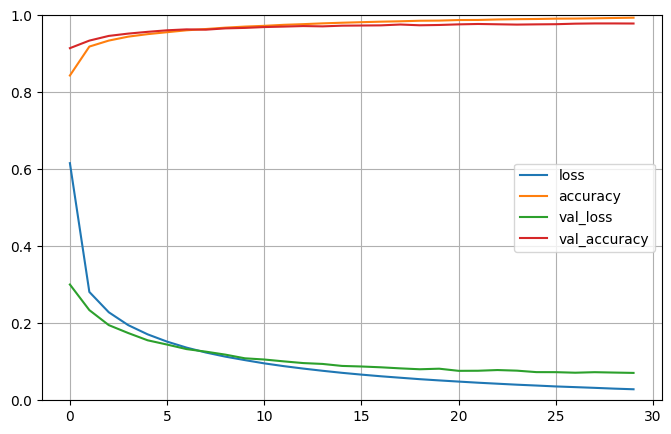

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9778


[0.07122249901294708, 0.9778000116348267]

In [ ]:
x_new=x_test[:3]
y_prob=model.predict(x_new)

1/1 [==============================] - 0s 104ms/step


In [ ]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
np.array(digit_names)[y_pred]

array(['Seven', 'Two', 'One'], dtype='<U5')

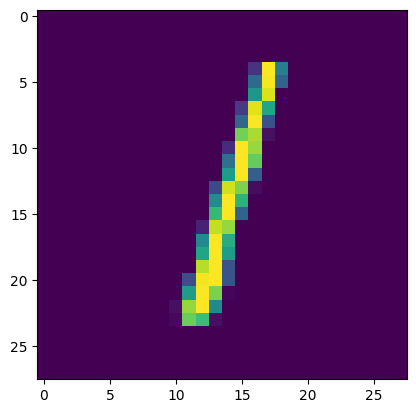

In [ ]:
plt.imshow(x_test[2])